In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
def simple_plot(x, y):
    fig, ax = plt.subplots()
    ax.plot(x, y, 'o-')

    ax.set(xlabel='time (s)', ylabel='number of samples',
       title='Performance')
    ax.grid()

#fig.savefig("test.png")
    plt.show()

## Q1) This problem was recently asked by Google.

Given a list of numbers and a number k, return whether any two numbers from the list add up to k.

For example, given [10, 15, 3, 7] and k of 17, return true since 10 + 7 is 17.

Bonus: Can you do this in one pass?

OBS: Complexity O(n) because uses dict which is a hash table, so the operation in average is O(1)

Pair with given sum 3 is (1, 2)
Pair with given sum 3 is (1, 2)
Pair with given sum 3 is (1, 2)
Pair with given sum 3 is (1, 2)
Pair with given sum 3 is (1, 2)


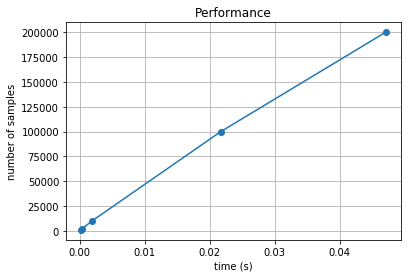

In [2]:
import time
import random

def two_sum_k(array, k):
    start = time.time()    
    #for i,val in enumerate(array):
    #    if k - val in array[i+1:]:
    #        print("Solution found : ", str(k - val)," + " ,str(array[i]))
    #        break
    #else:
    #    print ("No Solution Found")
    #s = set() 
    d = dict() 
    for i in range(0, len(array)): 
        temp = k-array[i] 
        if (temp in d): 
            print ("Pair with given sum "+ str(k) + " is (" + str(array[i]) + ", " + str(temp) + ")")
            break
        d[i] = (array[i]) 
    else:
        print("No solution was found")
    #print ()
    return result, (time.time() - start)

sizes = [1000,2000, 10000, 100000,200000]
seconds = [0,0,0,0,0]
result = 0
for index,s in enumerate(sizes):
    aux = [random.randint(5, 99999999999) for i in range(s)]
    aux.append(1)
    aux.append(2)
    result, seconds[index] = two_sum_k(aux, 3)
    
simple_plot(seconds,sizes)





## Q2 This problem was asked by Uber.

Given an array of integers, return a new array such that each element at index i of the new array is the product of all the numbers in the original array except the one at i.

For example, if our input was [1, 2, 3, 4, 5], the expected output would be [120, 60, 40, 30, 24]. If our input was [3, 2, 1], the expected output would be [2, 3, 6].

Follow-up: what if you can't use division?

In [3]:
#First Solution
def multiply_index_out(array): #8
    #Without considering that zero will be in the array
    #Can use extra space or division
    mult = 1
    for val in array:
        mult *= val
    
    result =[]
    for val in array:
        result.append(mult/val)
    print (result)

#time O(n)
#space O(n)
#multiply_index_out([1,2,3,4,5])

#Second Solution (brute force)
def mult_except_one(array):
    result = []
    
    for i in range(0,len(array)):
        aux=1    
        j = (i+1) % len(array)
        while ( j % len(array) !=  i ):
            aux = aux*array[j % len(array)]
            j+= 1  
        
        result.append(aux)
        
    print(result)
#mult_except_one([1,2,3,4,5])

#O(n²)

#Third Solution (bonus: without_division and faster)
def mult_except_one2(array): 
    aux = 1
    mult = [1 for i in range(len(array))] 
    
    for i in range(0, len(array)):
        mult[i] = aux
        aux *= array[i]

    aux = 1
    for i in range(len(array)-1, -1,-1):
        mult[i] *= aux
        aux *= array[i]
    
    print (mult)
#Time: O(n)
#Space: O(n)
mult_except_one2([1,2,3,4,5])


[120, 60, 40, 30, 24]


## Q3 This problem was asked by Google.

Given the root to a binary tree, implement serialize(root), which serializes the tree into a string, and deserialize(s), which deserializes the string back into the tree.

In [4]:
class Node: #45
    def __init__(self, val, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def serialize(head): #O(n)
    if head == None:
        return ""
    
    result = head.val
    if head.left != None:
        result += "[" + serialize(head.left)+ "]"
    if head.right != None:
        result += "[" + serialize(head.right) +"]"
    
    return result

def deserialize(myString, head=None): #O(n)
    pos = myString.find("[")
    val = myString[:pos]
    
    count = 0
    count2 =0
    
    left,right = None, None
     
    for i in range(0, len(myString)):
        if (myString[i] == "["):
            count +=1
        elif (myString[i] == "]"):
            count2 +=1
        
        if (count == count2 and count!=0):
            left = deserialize(myString[pos+1:i+1])
            pos = i+1
            break

    count = 0
    count2 =0
    for i in range(pos, len(myString)):
        if (myString[i] == "["):
            count +=1
        elif (myString[i] == "]"):
            count2 +=1
        
        if (count == count2 and count!=0):
            right = deserialize(myString[pos+1:i+1])
            
            break
    return Node(val, left, right)
   
        

node = Node('root', Node('left', Node('left.left')), Node('right'))
x = deserialize(serialize(node))
print(x.left.val)
print(x.left.left.val)
print(x.right.val)
print(serialize(node))

assert deserialize(serialize(node)).left.left.val == 'left.left'



left
left.left
right
root[left[left.left]][right]


## Q4 This problem was asked by Stripe.

Given an array of integers, find the first missing positive integer in linear time and constant space. In other words, find the lowest positive integer that does not exist in the array. The array can contain duplicates and negative numbers as well.

For example, the input [3, 4, -1, 1] should give 2. The input [1, 2, 0] should give 3.

You can modify the input array in-place.

In [5]:
def lowest_positive_integer(array):
    j = len(array)-1
    #for i in range(len(array)-1):
    i=0
    while i < len(array)-1 and i < j:
        if array[i] < 0:
            
            aux = array[j]
            array[j] = array[i]
            array[i] = aux
            #print(array[i])

            j-=1
        i+=1
    
    i=0
    aux = array[0]
    print(array)
    while i < (j+2):
        
        if aux < j+1 and aux != -1:
            newAux = array[aux]
            array[aux] =-1
            aux = newAux

        else:
            aux = array[i]
            i+=1
       # print(aux)
    print(array)
    for i in range(len(array)):
        if array[i] != i and array[i]!=-1:
            result = i
            break
    print(result)
    
array = [3,4,-1,1]
array = [-1,1,9,8,9,15,22,1,2,-2,6,3,4,7,12,-1,-1,5,0]
lowest_positive_integer(array)

[0, 1, 9, 8, 9, 15, 22, 1, 2, 5, 6, 3, 4, 7, 12, -1, -1, -2, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 6, 3, -1, 7, 12, -1, -1, -2, -1]
10


## Q5 This problem was asked by Jane Street.

cons(a, b) constructs a pair, and car(pair) and cdr(pair) returns the first and last element of that pair. For example, car(cons(3, 4)) returns 3, and cdr(cons(3, 4)) returns 4.

Given this implementation of cons:

def cons(a, b):
    def pair(f):
        return f(a, b)
    return pair
Implement car and cdr.

In [6]:
def cons(a, b): #Functional programming
    def pair(f):
        return f(a, b)
    return pair

def car(f):
    def first(a, b):
        return a
    return f(first)

def cdr(f):
    def second(a,b):
        return b
    return f(second)

print(car(cons(3,4)))
print(cdr(cons(3,4)))

3
4


## Q6 This problem was asked by Google.

An XOR linked list is a more memory efficient doubly linked list. Instead of each node holding next and prev fields, it holds a field named both, which is an XOR of the next node and the previous node. Implement an XOR linked list; it has an add(element) which adds the element to the end, and a get(index) which returns the node at index.

If using a language that has no pointers (such as Python), you can assume you have access to get_pointer and dereference_pointer functions that converts between nodes and memory addresses.

### skipped


## Q7 This problem was asked by Facebook.

Given the mapping a = 1, b = 2, ... z = 26, and an encoded message, count the number of ways it can be decoded.

For example, the message '111' would give 3, since it could be decoded as 'aaa', 'ka', and 'ak'.

You can assume that the messages are decodable. For example, '001' is not allowed.

In [7]:
def decode_map(str_input):
    
    memo = [None] * len(str_input)
    return decode(str_input, len(str_input) ,memo)

def decode(data,a, memo):
    if a == 0:
        return 1
    
    b = len(data) - a
    
    if memo[a-1] !=None:
        return memo[a]
    
    result = decode(data, a-1, memo)
    if a > 1 and int(data[b:b+2]) < 26:
        result += decode(data, a-2,memo)
        memo[a-1] = result
    return result

decode_map('111')

3

## Q8 This problem was asked by Google.

A unival tree (which stands for "universal value") is a tree where all nodes under it have the same value.

Given the root to a binary tree, count the number of unival subtrees.

For example, the following tree has 5 unival subtrees:

   0
   
  / \
 
 1   0

    /\
   
    1  0
  
   / \
 
   1   1

  a
 / \
c   b
    /\
   b  b
        \
         b

In [8]:
class TreeNode():
    def __init__(self, data, left=None, right=None):
        self.data = data
        self.right = right
        self.left = left
        
root = TreeNode('0')
root.left = TreeNode('1')
root.right = TreeNode('0')
root.right.left = TreeNode('1')
root.right.right = TreeNode('0')
root.right.left.left = TreeNode('1')
root.right.left.right = TreeNode('1')

head = TreeNode('a')
head.left = TreeNode('c')
head.right = TreeNode('b')
head.right.left = TreeNode('b')
head.right.right = TreeNode('b')
head.right.right.right = TreeNode('b')

start = TreeNode('a')
start.left = TreeNode('a')
start.right = TreeNode('a')
start.right.left = TreeNode('a')
start.right.right = TreeNode('a')
start.right.right.right = TreeNode('A')

#First Solution #O(n²) Top-Down
def isUnival(root, val): 
    if root == None:
        return True
    if root.data == val:
        return isUnival(root.left, val) and isUnival(root.right, val)
    return False

def univalCount(root):
    if root == None:
        return 0
    left = univalCount(root.left)
    right = univalCount(root.right)
    
    result = left + right
    if isUnival(root, root.data):
        result += 1
    return result

#Second solution bottom-up (O(n))

def countUnivalTree(root):
    result, _ = univalTree(root)
    return result

def univalTree(root):
    if root == None:
        return 0, True
    
    
    left, is_unival_left = univalTree(root.left)
    right, is_unival_right = univalTree(root.right)
    
    
    if is_unival_left and is_unival_right:
        
        if root.left == None and root.right == None: # Leaf
            return 1 + left + right, True
        
        #both values equals
        elif (root.left!= None and root.left.data == root.data) and (root.right!= None and root.right.data == root.data):
            return 1 + left +right, True
        
        #One of the child is None and the other is equal to the root
        elif (root.left != None and root.left.data == root.data and root.right == None) or (root.right != None and root.right.data == root.data and root.left == None):
            return 1 + left +right, True
        
        #Resumed if statement
        # if (root.left!= None and root.left.data != root.data) or (root.right!= None and root.right.data != root.data):
       #     return  right + left, False    
    
       # return 1 + left + right, True
        
        return left + right, False
    return left + right, False
#univalCount(root)
#univalCount(head)
#univalCount(start)
countUnivalTree(start)
#countUnivalTree(root)
#countUnivalTree(head)

3

## Q9 This problem was asked by Airbnb.

Given a list of integers, write a function that returns the largest sum of non-adjacent numbers. Numbers can be 0 or negative.

For example, [2, 4, 6, 2, 5] should return 13, since we pick 2, 6, and 5. [5, 1, 1, 5] should return 10, since we pick 5 and 5.

Follow-up: Can you do this in O(N) time and constant space?

In [3]:
def largest_nonAdjacentSum(input_array):
    if (len(input_array) == 0):
        return 0
    
    a = 0
    b = 0
    
    for val in input_array:
        if (b > a):
            b2 = b
        else:
            b2 = a
        
        a = b + val
        b = b2
    
    return b if b >a else a
    
    
print(largest_nonAdjacentSum([2,4,6,2,5]))
print(largest_nonAdjacentSum([2,4,-6,2,5]))
print(largest_nonAdjacentSum([5,1,1,5]))

13
9
10


## Q10 This problem was asked by Apple.

Implement a job scheduler which takes in a function f and an integer n, and calls f after n milliseconds.

In [7]:
import time

def job_scheduler(f, n):
    time.sleep(n)
    print(f)
def func(a,b):
    return a+b

job_scheduler(func(10,20), 3/100)

30
